# House price prediction (Ames, Iowa)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
pd.options.mode.chained_assignment = None 

In [2]:
trainDf = pd.read_csv('train.csv')

In [3]:
trainDf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
trainDf.describe()

/Users/nemo/anaconda/envs/bookrecommender/lib/python2.7/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Do some data exploration

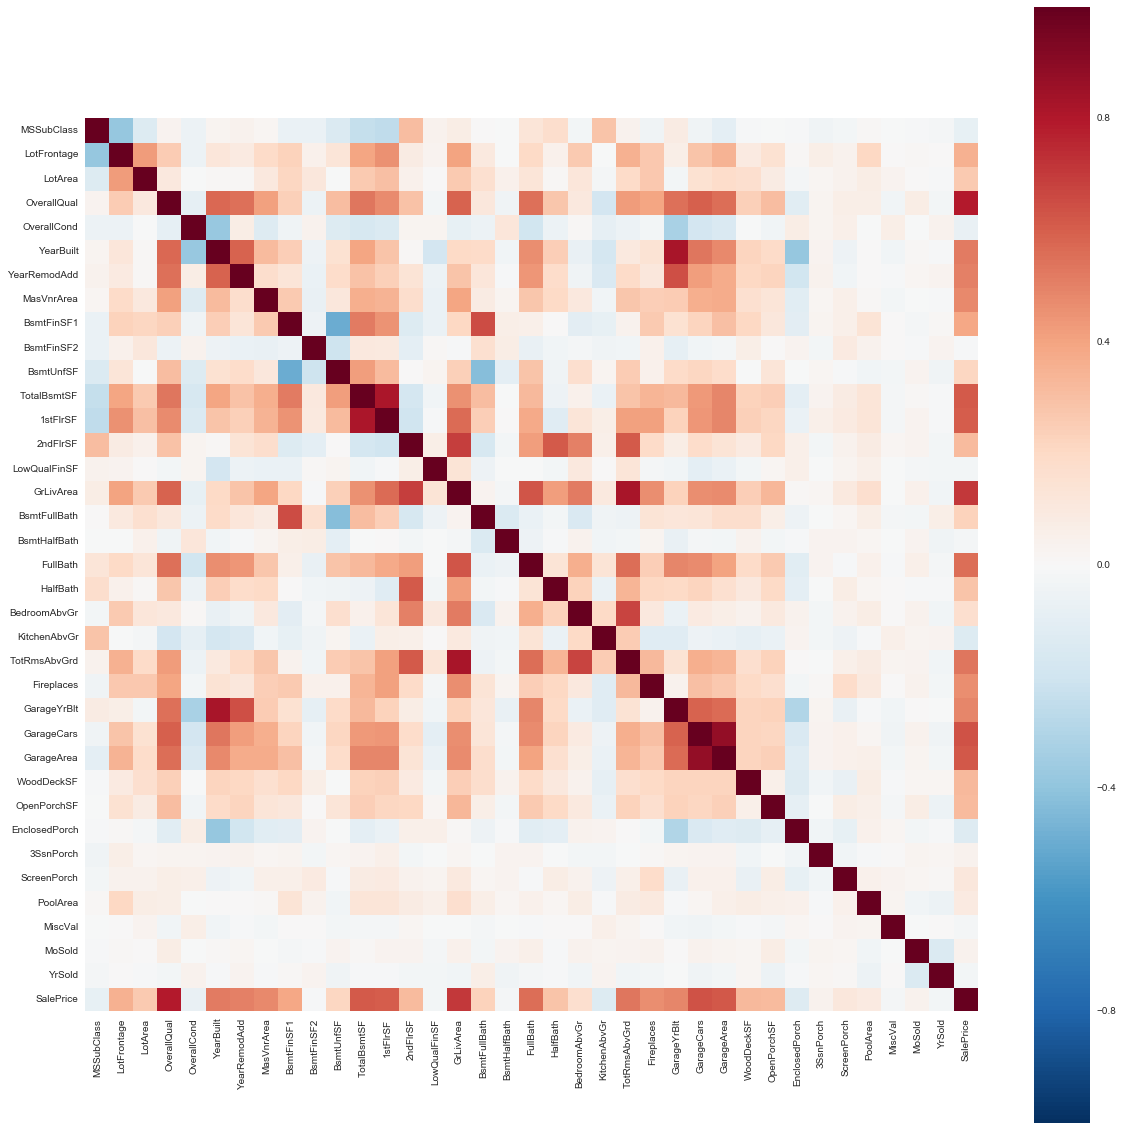

In [5]:
plt.figure(figsize=(20, 20))
corr = trainDf.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
sns.heatmap(corr, vmax=1, square=True)

In [6]:
trainDf1 = trainDf.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:]

In [7]:
trainDf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
G

# Do the test train split now

In [8]:
from sklearn.cross_validation import train_test_split
X = trainDf.iloc[:,:-1]
y = trainDf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Imputing data

## 1. Lot Frontage 
(continous data - the spread of data is even through all sales price. So I replaced missing values with mean)

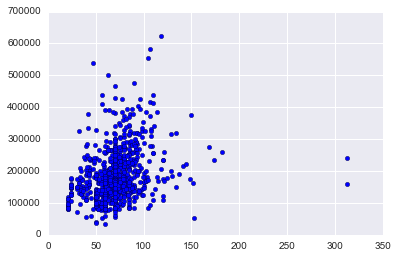

In [9]:
X_train['LotFrontage']=X_train.LotFrontage.fillna(X_train.LotFrontage.mean())
plt.scatter(X_train.LotFrontage, y_train)

## 2. Alley
nan's have no alley access according to the description


In [10]:
X_train['Alley'] = X_train['Alley'].fillna('None')
X_train['MasVnrType'] = X_train['MasVnrType'].fillna('None')
X_train['MasVnrArea'] = X_train['MasVnrArea'].fillna(0)

In [11]:
X_train['BsmtQual'] = X_train.BsmtQual.fillna('NA')
X_train['BsmtCond'] = X_train.BsmtCond.fillna('NA')
X_train['BsmtFinType1'] = X_train.BsmtFinType1.fillna('NA')
X_train['BsmtFinType2'] = X_train.BsmtFinType2.fillna('NA')
X_train['BsmtExposure'] = X_train.BsmtFinType2.fillna('NA')
# Nulls for fireplaces correspond to None
X_train['FireplaceQu'] = X_train['FireplaceQu'].fillna('NA')
X_train['GarageType'] = X_train['GarageType'].fillna('None')

In [12]:
X_train['GarageYrBlt'] = (X_train['GarageYrBlt'] - X_train['GarageYrBlt'].max())*-1.0
X_train['GarageYrBlt'] = X_train['GarageYrBlt'].fillna(-1)
## Make sure other years are similarly scaled
X_train['YearBuilt'] = (X_train['YearBuilt'] - X_train['YearBuilt'].max())*-1.0
X_train['YearRemodAdd'] = (X_train['YearRemodAdd'] - X_train['YearRemodAdd'].max())*-1.0
X_train['YrSold'] = (X_train['YrSold'] - X_train['YrSold'].max())*-1.0

In [13]:
X_train['GarageFinish'] = X_train['GarageFinish'].fillna('NA')
X_train['GarageQual'] = X_train['GarageQual'].fillna('NA')
X_train['GarageCond'] = X_train['GarageCond'].fillna('NA')
X_train['PoolQC'] = X_train['PoolQC'].fillna('NA')
X_train['Fence'] = X_train['Fence'].fillna('NA')

## Add additional features to the dataframe
X_train['Gar2'] = 0
X_train[X_train.MiscFeature == 'Gar2'].Gar2 = 1
X_train['Shed'] = 0
X_train[X_train.MiscFeature == 'Shed'].Shed = 1
X_train['TennisCourt'] = 0
X_train[X_train.MiscFeature == 'TenC'].TennisCourt = 1

In [14]:
## get dummies for MiscFeature
X_train['MiscFeature'].fillna('NA')
dum = pd.get_dummies(X_train['MiscFeature'].fillna('NA'))
del dum['NA']
for col in dum.columns:
    dum[col] = dum[col]*X_train['MiscVal']
    X_train[col] = dum[col]
del X_train['MiscFeature']
del X_train['MiscVal']

In [15]:
X_train = X_train.dropna()

In [16]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,Gar2,Othr,Shed,TenC
615,616,85,RL,80.0,8800,Pave,None,Reg,Lvl,AllPub,...,NA,MnPrv,5,-0.0,WD,Abnorml,0.0,0.0,0.0,0.0
613,614,20,RL,70.0,8402,Pave,None,Reg,Lvl,AllPub,...,NA,NA,12,3.0,New,Partial,0.0,0.0,0.0,0.0
1303,1304,20,RL,73.0,8688,Pave,None,Reg,Lvl,AllPub,...,NA,NA,4,4.0,WD,Normal,0.0,0.0,0.0,0.0
486,487,20,RL,79.0,10289,Pave,None,Reg,Lvl,AllPub,...,NA,NA,6,3.0,WD,Normal,0.0,0.0,0.0,0.0
561,562,20,RL,77.0,10010,Pave,None,Reg,Lvl,AllPub,...,NA,NA,4,4.0,WD,Normal,0.0,0.0,0.0,0.0


# Encoding categorical data

### Convert some of the ranked categorical to numerical data

In [17]:
cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',\
        'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
Qs = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, 'NA':-1}
for col in cols:
    X_train[col] = X_train[col].apply(lambda x: Qs[x])

### Encode non-ranked data

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
oneHotEncoder = preprocessing.OneHotEncoder()
cols_that_need_to_be_encoded = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', \
                               'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',\
                               'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',\
                               'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','GarageType',\
                               'Functional', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']

for col in cols_that_need_to_be_encoded:
    # First encode the fucking labels to integers
    X_train[col] = le.fit_transform(X_train[col])
    oneHotEncoder.fit([[x] for x in set(X_train[col])])
    X_train[col] = X_train[col].apply(lambda x: oneHotEncoder.transform(x).toarray())

In [18]:
## Somehow the sklearn is messing up on one hot encoding
cols_that_need_to_be_encoded = X_train.select_dtypes(include = ['object']).columns
for col in cols_that_need_to_be_encoded:
    X_train = pd.concat([X_train, pd.get_dummies(X_train[col]).rename(columns = lambda x:str(col)+'_'+x)], axis = 1)

In [19]:
for col in cols_that_need_to_be_encoded:
    del X_train[col]

# Preprocessing: Scaling features

### Scale all numerical data between 0-1

In [20]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler()
#X_train[list(X_train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].columns.values)] = minmax.fit_transform(X_train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].as_matrix())
X_train.iloc[:,1:] = minmax.fit_transform(X_train.iloc[:,1:])

# Feature importance


In [21]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
615,616,0.382353,0.202055,0.035056,0.555556,0.75,0.340580,0.783333,0.113208,0.333333,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
613,614,0.000000,0.167808,0.033195,0.444444,0.50,0.021739,0.050000,0.000000,0.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1303,1304,0.000000,0.178082,0.034532,0.666667,0.50,0.036232,0.083333,0.165457,0.666667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
486,487,0.000000,0.198630,0.042015,0.444444,0.75,0.326087,0.750000,0.121916,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
561,562,0.000000,0.191781,0.040711,0.444444,0.50,0.260870,0.583333,0.000000,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


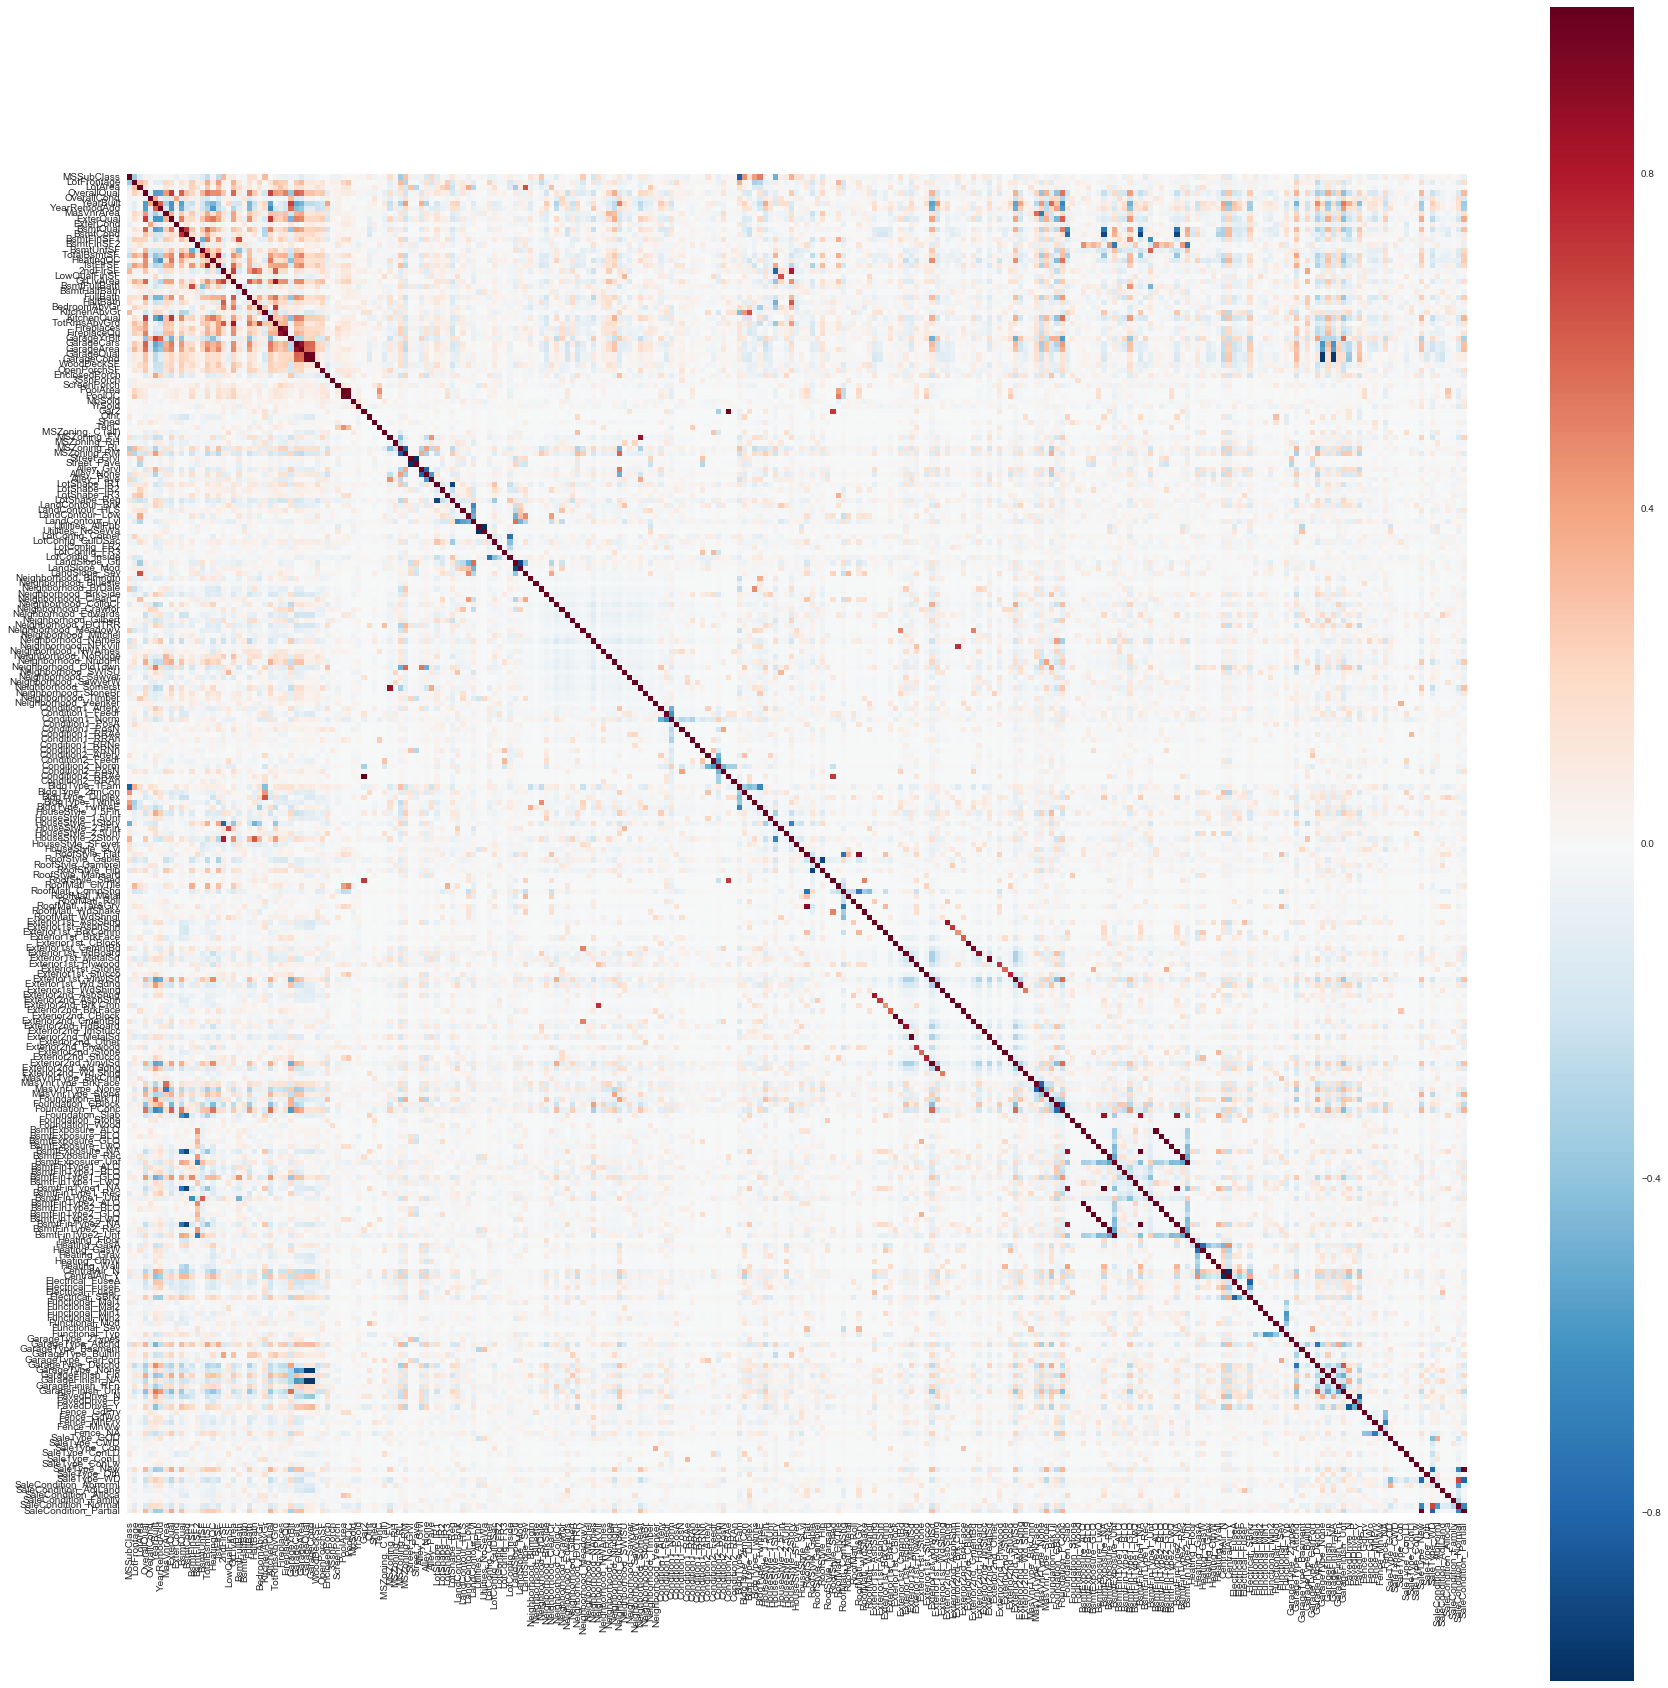

In [22]:
plt.figure(figsize=(30, 30))
corr = X_train.iloc[:,1:].corr()
sns.heatmap(corr, vmax=1, square=True)

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
SKbest = SelectKBest(f_regression, k=75)
X_train_new = SKbest.fit_transform(X_train, y_train[X_train.index])

In [24]:
(zip(X_train.columns[SKbest.scores_.argsort()[::-1]],SKbest.scores_[SKbest.scores_.argsort()[::-1]]))


[('OverallQual', 1578.8530651625194),
 ('GrLivArea', 824.07604596477518),
 ('ExterQual', 776.77516875362141),
 ('KitchenQual', 739.15902005359135),
 ('GarageCars', 696.02547882031888),
 ('GarageArea', 627.84670284235426),
 ('TotalBsmtSF', 522.4975566072701),
 ('1stFlrSF', 501.49840566208491),
 ('BsmtQual', 420.77410668862422),
 ('FullBath', 403.10572510630146),
 ('FireplaceQu', 373.88415947926092),
 ('YearRemodAdd', 366.37241442034571),
 ('YearBuilt', 358.16747736278103),
 ('TotRmsAbvGrd', 355.3436788532905),
 ('Foundation_PConc', 302.14418524206127),
 ('MasVnrArea', 276.68069056240029),
 ('Fireplaces', 261.14525983219187),
 ('HeatingQC', 235.98908292484626),
 ('BsmtFinType1_GLQ', 217.36151439195672),
 ('GarageFinish_Unf', 200.77073329146853),
 ('GarageFinish_Fin', 186.57091645623075),
 ('Neighborhood_NridgHt', 180.64462546358973),
 ('GarageYrBlt', 152.26654080210417),
 ('SaleCondition_Partial', 146.61575266116975),
 ('SaleType_New', 146.02167984548259),
 ('MasVnrType_None', 145.136814

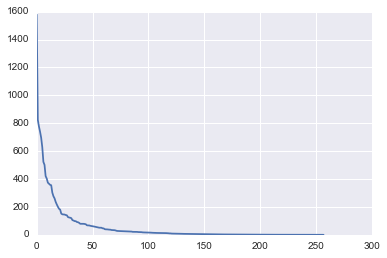

In [25]:
plt.plot(SKbest.scores_[SKbest.scores_.argsort()[::-1]])

# Seems like the feature importance tapers off after 75. So lets narrow it down to top 75 features

In [26]:
selected_cols = X_train.columns[SKbest.scores_.argsort()[::-1]][:75]

# Try to work with random forests

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
estimator = RandomForestRegressor(random_state = 42, n_estimators=100, max_depth = 3)
trees = estimator.fit(X_train[selected_cols], y_train[X_train.index])
score = cross_val_score(estimator, X_train[selected_cols], y_train[X_train.index]).mean()

In [ ]:
plt.plot(range(0,len(X_train.columns)-1), pca.explained_variance_ratio_)

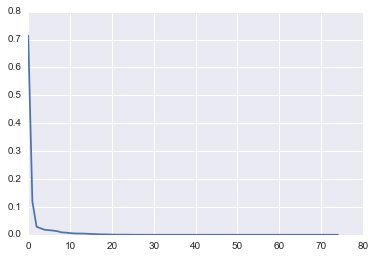

In [43]:
plt.plot(trees.feature_importances_[trees.feature_importances_.argsort()[::-1]])


# Seems like important features drop off dramatically after 4, lets only focus on top 10 features

Top 10 features are:

In [67]:
top_10_features = selected_cols[trees.feature_importances_.argsort()[::-1]][:20]

# Collinearity?

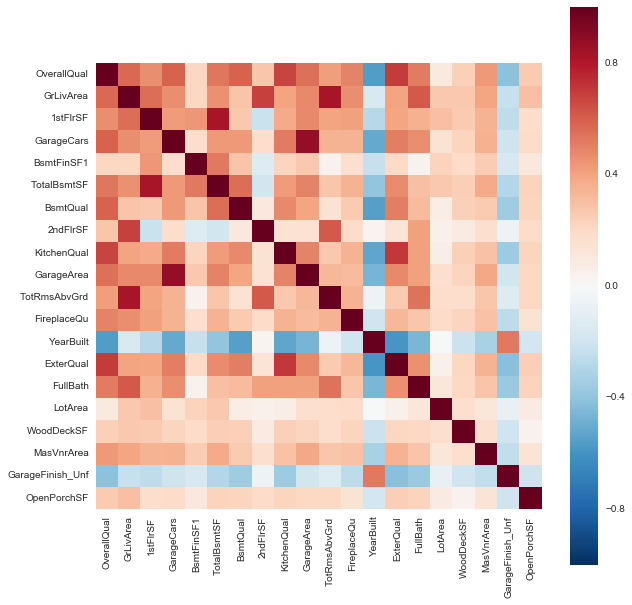

In [68]:
plt.figure(figsize=(10, 10))
corr = X_train[top_10_features].corr()
sns.heatmap(corr, vmax=1, square=True)
plt.rcParams.update({'font.size': 22})

# Seems like some of the features are correlated to each other:
For example:

TotalBasement(SqFoot) is correlated with 1st floor sqft

Garage area is correlated with garage cars

We could engineer features with this or just use one of them

In [70]:
top_10_features = top_10_features.drop('TotalBsmtSF')

In [69]:
top_10_features = top_10_features.drop('GarageArea')

In [71]:
top_10_features

Index([u'OverallQual', u'GrLivArea', u'1stFlrSF', u'GarageCars', u'BsmtFinSF1',
       u'BsmtQual', u'2ndFlrSF', u'KitchenQual', u'TotRmsAbvGrd',
       u'FireplaceQu', u'YearBuilt', u'ExterQual', u'FullBath', u'LotArea',
       u'WoodDeckSF', u'MasVnrArea', u'GarageFinish_Unf', u'OpenPorchSF'],
      dtype='object')

# Let's try different regression techniques

# 1. Linear regression

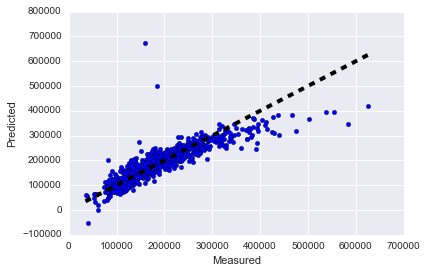

36848.8420173


In [78]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_predict

lr = linear_model.LinearRegression()
y_sub = y_train[X_train.index]
predicted = cross_val_predict(lr, X_train[top_10_features], y_sub, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_sub, predicted)
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

mse_lr = mean_squared_error(y_sub, predicted)
print np.sqrt(mse_lr)

In [84]:
lr.fit(X_train[top_10_features], y_sub).coef_

array([ 124518.42149043,  259150.59987558,  -74570.40776501,
         58899.28393109,   83868.32493593,   28325.09000493,
        -48772.05114003,   35337.43834679,   47485.37660583,
         15388.56390048,  -13045.58056566,   42478.79079758,
         -4310.60239515,  120520.54377626,   21721.30998623,
         28633.87210695,   -6486.13383652,   -3423.07494066])

# 2. Linear regression (Lasso)

tune for alpha first!

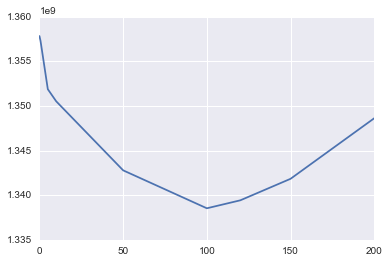

In [99]:
a = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.6, 1,5,10, 50, 100, 120, 150,200]
mse_lass = []
for al in a:
    clf = linear_model.Lasso(alpha=al)
    predicted_lasso = cross_val_predict(clf, X_train[top_10_features], y_sub, cv=10)
    mse_lass.append(mean_squared_error(y_sub, predicted_lasso))
plt.plot(a, mse_lass)

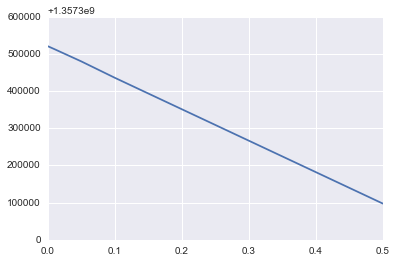

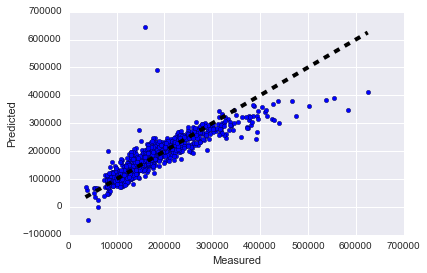

36585.9252375


In [101]:
clf = linear_model.Lasso(alpha=100)
predicted_lasso = cross_val_predict(clf, X_train[top_10_features], y_sub, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_sub, predicted_lasso)
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

mse_lasso = mean_squared_error(y_sub, predicted_lasso)
print np.sqrt(mse_lasso)

In [102]:
clf.fit(X_train[top_10_features], y_sub).coef_

array([ 123506.51843972,  113298.04348676,   39684.29472844,
         59730.39901024,   76610.52041143,   27953.8510293 ,
             0.        ,   35933.45475176,   44587.49775098,
         16707.57078324,   -9089.13385513,   41531.02551208,
             0.        ,   89946.41674765,   20622.51552425,
         25939.68908464,   -7113.47136896,      -0.        ])

## features not being used in the fit

In [145]:
not_zero = top_10_features[clf.fit(X_train[top_10_features], y_sub).coef_ != 0.]
print not_zero

Index([u'OverallQual', u'GrLivArea', u'1stFlrSF', u'GarageCars', u'BsmtFinSF1',
       u'BsmtQual', u'KitchenQual', u'TotRmsAbvGrd', u'FireplaceQu',
       u'YearBuilt', u'ExterQual', u'LotArea', u'WoodDeckSF', u'MasVnrArea',
       u'GarageFinish_Unf'],
      dtype='object')


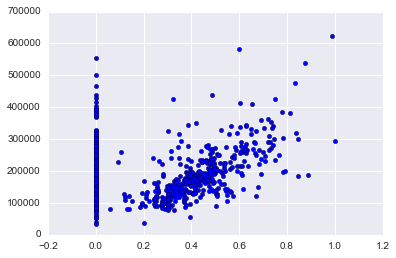

In [140]:
plt.scatter(X_train['2ndFlrSF'], y_sub)

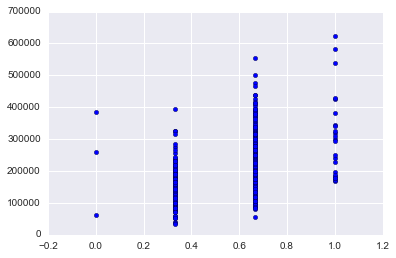

In [141]:
plt.scatter(X_train['FullBath'], y_sub)

In [ ]:
plt.scatter(X_train['FullBath'], y_sub)

# 3. Ridge Regression

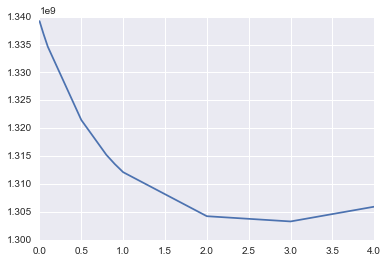

In [147]:
a = [0.001, 0.005, 0.05, 0.1, 0.5, 0.8, 0.9, 1, 2, 3, 4]
mse_ridg = []
for al in a:
    clf_ridge = linear_model.Ridge(alpha=al)
    predicted_ridge = cross_val_predict(clf_ridge, X_train[not_zero], y_sub, cv=10)
    mse_ridg.append(mean_squared_error(y_sub, predicted_ridge))
plt.plot(a, mse_ridg)

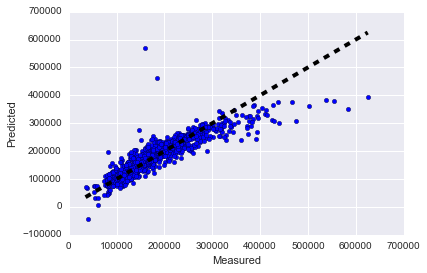

36101.1010407


In [148]:
clf_ridge = linear_model.Ridge(alpha=3)
predicted_ridge = cross_val_predict(clf_ridge, X_train[not_zero], y_sub, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_sub, predicted_ridge)
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

mse_ridge = mean_squared_error(y_sub, predicted_ridge)
print np.sqrt(mse_ridge)

# 4. Elastic Net

In [161]:
clf_EN = linear_model.ElasticNetCV(alphas=[0.001, 0.05, 0.01, 0.05, 0.1, 1.0], l1_ratio = [.1, 0.2, 0.3, .4, 0.45, .5, .7, .9])
clf_EN.fit(X_train[not_zero], y_sub)
print clf_EN.alpha_
print clf_EN.l1_ratio_

0.01
0.4


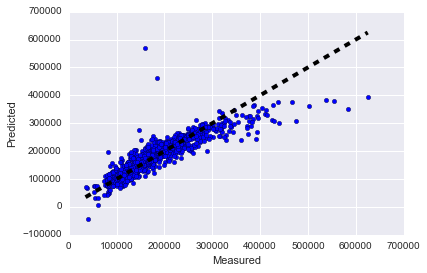

36101.1010407


In [163]:
clf_ElasticNet = linear_model.ElasticNet(alpha=0.01, l1_ratio = 0.4)
predicted_EN = cross_val_predict(clf_ridge, X_train[not_zero], y_sub, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_sub, predicted_EN)
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

mse_EN = mean_squared_error(y_sub, predicted_EN)
print np.sqrt(mse_EN)

# 5. Adding poly features

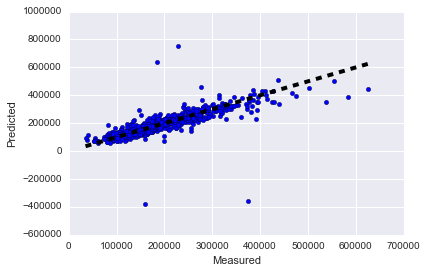

47216.7009775


In [168]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', linear_model.LinearRegression(fit_intercept=False))])
predicted_poly = cross_val_predict(model, X_train[not_zero], y_sub, cv=10)
fig, ax = plt.subplots()
ax.scatter(y_sub, predicted_poly)
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

mse_poly = mean_squared_error(y_sub, predicted_poly)
print np.sqrt(mse_poly)

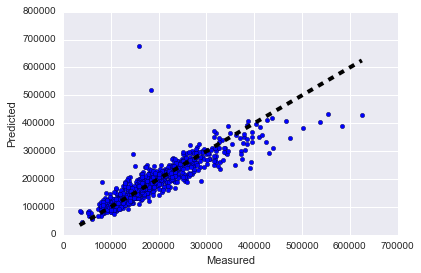

35312.9570437


In [170]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', clf_ElasticNet)])
predicted_poly = cross_val_predict(model, X_train[not_zero], y_sub, cv=10)
fig, ax = plt.subplots()
ax.scatter(y_sub, predicted_poly)
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

mse_poly = mean_squared_error(y_sub, predicted_poly)
print np.sqrt(mse_poly)

# 6. Random Forest Regression

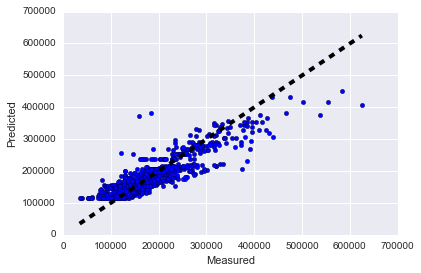

35024.7096701


In [180]:
from sklearn import ensemble
clf_randForest = ensemble.RandomForestRegressor(random_state = 42, max_depth = 3)

predicted_rand = clf_randForest.fit(X_train[not_zero], y_sub).predict(X_train[not_zero])
mse_rand = mean_squared_error(y_sub, predicted_rand)

fig, ax = plt.subplots()
ax.scatter(y_sub, predicted_rand)
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

print np.sqrt(mse_rand)


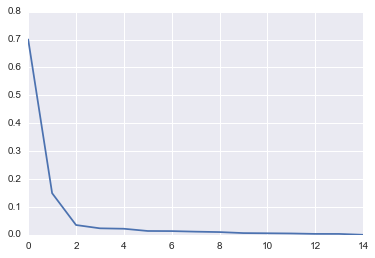

In [187]:
plt.plot(clf_randForest.fit(X_train[not_zero], y_sub).feature_importances_[clf_randForest.fit(X_train[not_zero], y_sub).feature_importances_.argsort()[::-1]])

In [189]:
not_zero[clf_randForest.fit(X_train[not_zero], y_sub).feature_importances_ == 0]

Index([u'LotArea'], dtype='object')

In [190]:
not_zero_new = not_zero.drop('LotArea')

# 7. Gradient boosting regressor

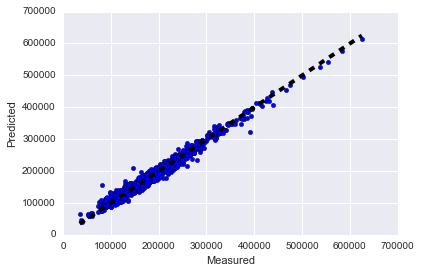

11818.521468


In [203]:
clf_grad = ensemble.GradientBoostingRegressor(random_state = 42, max_depth = 4)
grad_tree = clf_grad.fit(X_train[not_zero], y_sub)
predicted_grad = grad_tree.predict(X_train[not_zero])
mse_grad = mean_squared_error(y_sub, predicted_grad)

fig, ax = plt.subplots()
ax.scatter(y_sub, predicted_grad)
ax.plot([y_sub.min(), y_sub.max()], [y_sub.min(), y_sub.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

print np.sqrt(mse_grad)

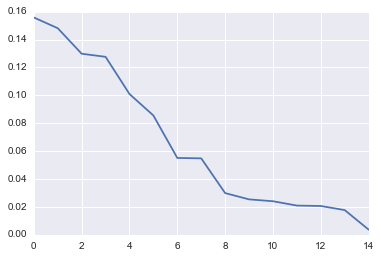

In [204]:
plt.plot(clf_grad.fit(X_train[not_zero], y_sub).feature_importances_[clf_grad.fit(X_train[not_zero], y_sub).feature_importances_.argsort()[::-1]])

In [205]:
clf_grad.fit(X_train[not_zero], y_sub).feature_importances_

array([ 0.08552853,  0.14810229,  0.12758145,  0.02065442,  0.10092101,
        0.02095365,  0.01771638,  0.02406431,  0.02990186,  0.12979792,
        0.02539812,  0.15578025,  0.05509058,  0.05479372,  0.00371553])

Index([u'OverallQual', u'GrLivArea', u'1stFlrSF', u'GarageCars', u'BsmtFinSF1',
       u'BsmtQual', u'KitchenQual', u'TotRmsAbvGrd', u'FireplaceQu',
       u'YearBuilt', u'ExterQual', u'LotArea', u'WoodDeckSF', u'MasVnrArea',
       u'GarageFinish_Unf'],
      dtype='object')

In [200]:
X_test[not_zero]

KeyError: "Index([u'GarageFinish_Unf'], dtype='object') not in index"